Content: Datacamp, Exploratory Data Analysis in Python

sns.color palettes, 🔗 [`link`](https://seaborn.pydata.org/tutorial/color_palettes.html)

# Books data set

## Getting to Know a Dataset

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [15]:
books = pd.read_csv("data/clean_books.csv")
books.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


In [16]:
# summarize missing values, data type, memory usage
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


In [18]:
# describe and summarize general stats info for numerical columns
books.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


In [19]:
# summarize the categorical columns 
books.value_counts("genre")

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

In [35]:
# Summarize the data types of the dataframe
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

In [33]:
#books.value_counts?

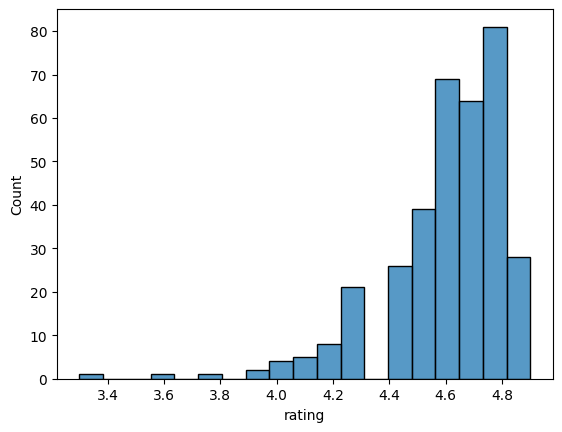

In [32]:
# Distribution of data
sns.histplot(data = books, x = "rating")
plt.show()

# The plot at 4.5 and 4.6 is a bit awkward

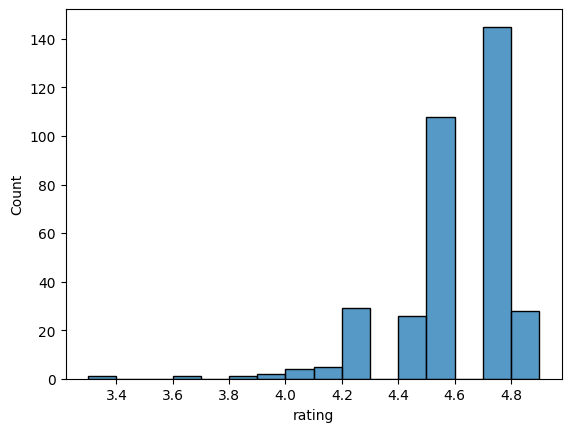

In [31]:
sns.histplot(data = books, x = "rating", binwidth =0.1)
plt.show()

In [38]:
# Update the type of such as year from float to integer
books['year'] = books['year'].astype(int)

# check the data type
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

In [50]:
# Validating catergorical data
genre_inv = books["genre"].isin(["Fiction","Non Fiction"])
genre_inv

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

In [51]:
# Adding ~, Tilde operator to invert the True/Fales values so that the function returns True if the value is not in the list passed to .isin()
genre_inv2 = ~books["genre"].isin(["Fiction","Non Fiction"])
genre_inv2

0      False
1      False
2      False
3      False
4       True
       ...  
345    False
346    False
347    False
348    False
349     True
Name: genre, Length: 350, dtype: bool

In [53]:
# Filtering the rows with the values in list passed to .isin()
books[books["genre"].isin(["Fiction","Non Fiction"])].head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction


### Validating numerical dat

In [55]:
books.select_dtypes("number").head()

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019


In [58]:
## Min and Max values
print(f"Min year value is : {books['year'].min()}")
print(f"Mac year value is : {books['year'].max()}")

Min year value is : 2009
Mac year value is : 2019


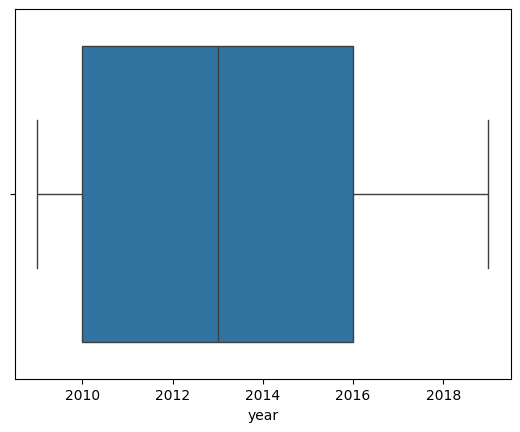

In [59]:
# more details of distribution of year
sns.boxplot(data= books, x = "year")
plt.show()

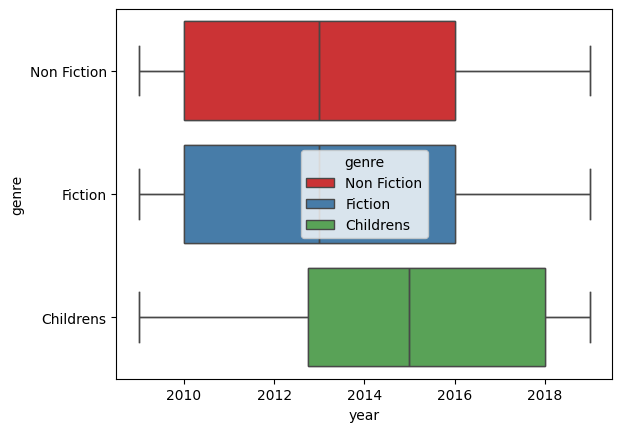

In [73]:
# sns.boxplot(data= books, x = "year", y = "genre")
sns.boxplot(data= books, x = "year", y = "genre", hue = 'genre', palette = "Set1", legend = True)
plt.show()

## EDA of groups: groupby() 

In [93]:

books.groupby("genre").sum(numeric_only = True)
books.groupby("genre").min(numeric_only = True)
books.groupby("genre").max(numeric_only = True)
books.groupby("genre").var(numeric_only = True)
books.groupby("genre").std(numeric_only = True)
books.groupby("genre").mean(numeric_only = True)

,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


In [92]:
books.groupby("genre").count()

,name,author,rating,year
genre,,,,
Childrens,40,40,40,40
Fiction,131,131,131,131
Non Fiction,179,179,179,179


In [80]:
#help(pd.DataFrame.agg)
#pd.DataFrame.count?
#books.agg?

In [103]:
#books.agg(["mean","std"])
numeric_books = books.select_dtypes("number")
numeric_books.agg(["mean","std"])


,rating,year
mean,4.608571,2013.508571
std,0.226941,3.284711


In [111]:
#numeric_books.agg({"rating":["mean", "std"], "year":["median"]})

books.agg({"rating":["mean", "std"], "year":["median"]})

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


In [109]:
books.groupby("genre").agg(mean_rating=("rating", "mean"),std_rating = ("rating", "std"),median_year = ("year", "median"))

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


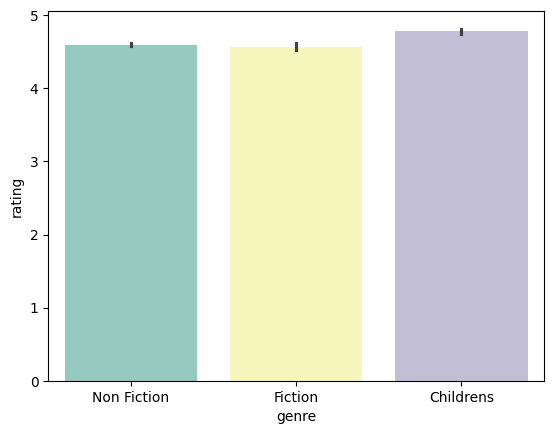

In [117]:
# Visualizing categorical summaries
sns.barplot(data = books, x = "genre", y = "rating", hue = "genre", palette = "Set3", legend = False)
plt.show()

## Data Cleaning and Imputation

# Unemployment data set

In [150]:
unemployment = pd.read_csv("data/clean_unemployment.csv")

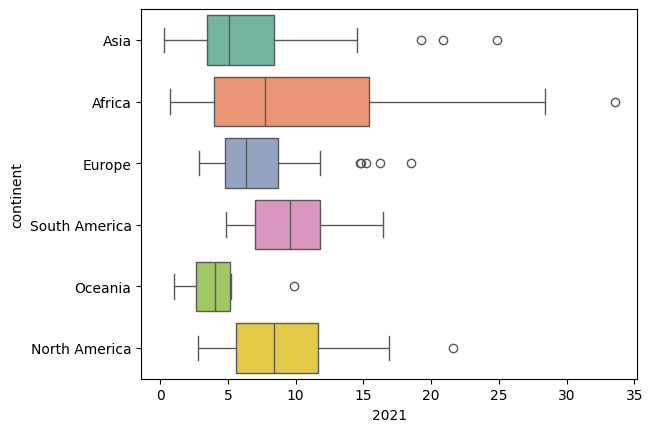

In [151]:
# Create a boxplot of 2021 unemployment rates, broken down by continent
sns.boxplot(data = unemployment, x = "2021", y = "continent", hue= 'continent', palette="Set2", legend=False)
plt.show()

In [152]:
unemployment.head()
unemployment_numeric = unemployment.select_dtypes("number")
unemployment.head()

,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90


In [153]:
# Print the mean and standard deviation of rates by year
print(unemployment_numeric.agg(["mean", "std"]))

          2010      2011      2012      2013      2014      2015      2016  \
mean  8.409286  8.315440  8.317967  8.344780  8.179670  8.058901  7.925879   
std   6.248887  6.266795  6.367270  6.416041  6.284241  6.161170  6.045439   

          2017      2018      2019      2020      2021  
mean  7.668626  7.426429  7.243736  8.420934  8.390879  
std   5.902152  5.818915  5.696573  6.040915  6.067192  


In [154]:
# Print yearly mean and standard deviation grouped by continent
unemployment_tmp = unemployment.drop(columns = ["country_code", "country_name"])
unemployment_tmp.head()

,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90


In [155]:
print(unemployment_tmp.groupby("continent").agg(["mean", "std"]))

                    2010                 2011                 2012            \
                    mean       std       mean       std       mean       std   
continent                                                                      
Africa          9.343585  7.411259   9.369245  7.401556   9.240755  7.264542   
Asia            6.240638  5.146175   5.942128  4.779575   5.835319  4.756904   
Europe         11.008205  6.392063  10.947949  6.539538  11.325641  7.003527   
North America   8.663333  5.115805   8.563333  5.377041   8.448889  5.495819   
Oceania         3.622500  2.054721   3.647500  2.008466   4.103750  2.723118   
South America   6.870833  2.807058   6.518333  2.801577   6.410833  2.936508   

                    2013                 2014            ...      2017  \
                    mean       std       mean       std  ...      mean   
continent                                                ...             
Africa          9.132453  7.309285   9.121321  7.291359  

In [156]:
continent_summary = unemployment.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021=("2021","mean"),
    # Create the std_rate_2021 column
    std_rate_2021=("2021","std")
)
print(continent_summary)

               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585       8.131636
Asia                 6.906170       5.414745
Europe               7.414872       3.947825
North America        9.155000       5.076482
Oceania              4.280000       2.671522
South America        9.924167       3.611624


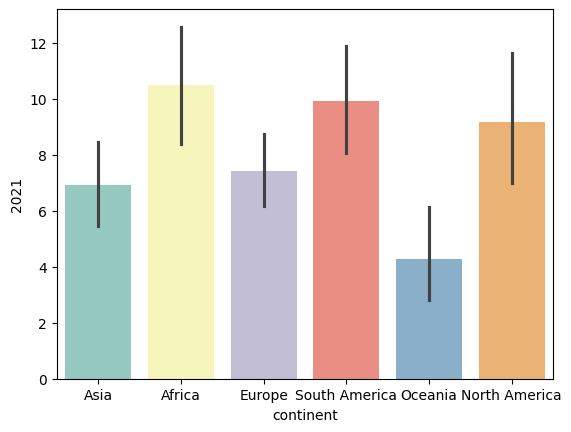

In [157]:
#In Seaborn, bar plots include a vertical bar indicating the 95% confidence interval for the categorical mean.


# Create a bar plot of continents and their 2021 average unemployment
sns.barplot(data=unemployment, x="continent", y="2021", hue = "continent", palette = "Set3", legend = False)
plt.show()